0. **Only keep French tweets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Only keep French tweets
!pip install -q langdetect
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 42  # Make results deterministic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
def is_french_langdetect(text):
    try:
        return detect(str(text)) == 'fr'
    except:
        return False  # Skip unrecognizable text

In [ ]:
import pandas as pd

# Set file path
file_path = '/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/new_left_10462.csv'

# Load CSV and ensure 'id' is string
df = pd.read_csv(file_path, dtype={'id': str})
df = df.dropna(subset=['content'])

# Count before
total_before = len(df)

# Filter French tweets using langdetect
df_fr = df[df['content'].apply(is_french_langdetect)].reset_index(drop=True)

# Count after
total_after = len(df_fr)
removed = total_before - total_after
percentage_removed = (removed / total_before) * 100

# Show summary
print(f"Total tweets before filtering: {total_before}")
print(f"Total tweets after filtering: {total_after}")
print(f"Tweets removed: {removed} ({percentage_removed:.2f}%)")

# Show sample
if len(df_fr) > 0:
    print("\nSample of 5 French tweets:")
    print(df_fr['content'].sample(5, random_state=42).to_string(index=False))
else:
    print("⚠️ No French tweets detected.")

# Save result
output_path = '/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-new-french-tweets.csv'
df_fr.to_csv(output_path, index=False)
print(f"\n✅ French tweets saved to: {output_path}")

Total tweets before filtering: 100635
Total tweets after filtering: 73793
Tweets removed: 26842 (26.67%)

Sample of 5 French tweets:
         @Perrette56 Merci beaucoup c'est gentil 😘
Adios le "spécialiste des penaltys" ...🤡\n#Merc...
@ArSaint_Martin @EmilieHaon Un grand nombre de ...
    @RemikenzoPages tout ça c’est grâce à l’AJAR😝🩷
             #QuelleEpoque https://t.co/kaV5QSKBYS

✅ French tweets saved to: /content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-new-french-tweets.csv


1. Define function


* Remove URLs
* Remove @usernames
* Remove leading #
* Normalize whitespace
* Lowercase
* Save clean CSV

In [ ]:
import pandas as pd
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)          # Remove URLs
    text = re.sub(r'@\w+', '', text)                             # Remove @usernames
    text = re.sub(r'#(\w+)', r'\1', text)                        # Remove leading #
    text = re.sub(r'\s+', ' ', text).strip()                     # Normalize whitespace
    text = text.lower()                                          # Lowercase text

    # Normalize reduplications
    for pattern, replacement in reduplications.items():
        text = re.sub(pattern, replacement, text)

    # Standardize abbreviations
    for pattern, replacement in abbreviations.items():
        text = re.sub(pattern, replacement, text)

    return text

def clean_tweets(input_path, output_path):
    # Load CSV
    df = pd.read_csv(input_path, dtype={'id': str})

    # Remove rows where 'content' is missing
    df = df.dropna(subset=['content'])

    # Apply cleaning function
    df['content'] = df['content'].apply(clean_text)

    # Remove empty content rows again
    df = df[df['content'].str.strip() != '']

    # Output info
    print(f"Remaining rows: {len(df)}")
    total_tokens = df['content'].str.split().str.len().sum()
    print(f"Total number of tokens: {total_tokens}")

    # Save cleaned file
    df.to_csv(output_path, index=False)

    return df

2. Call function

In [ ]:
# 🧹 Run your existing cleaning function
cleaned_df = clean_tweets('/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-new-french-tweets.csv', '/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-new-cleaned-french-tweets.csv') # output file will still be in /content

Remaining rows: 73363
Total number of tokens: 1478776


3. Check at random if everything's okay

In [ ]:
# inspect random samples

import pandas as pd

# Load the final cleaned file
df = pd.read_csv('/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-new-cleaned-french-tweets.csv', dtype={'id': str})

# Check basic info
print(f"Loaded {df.shape[0]} tweets.")
print("Column names:", df.columns.tolist())

# Show 5 random tweets
df.sample(5, random_state=645)

Loaded 73363 tweets.
Column names: ['id', 'username', 'content', 'created_at', 'has_photo', 'has_video', 'is_response']


,id,username,content,created_at,has_photo,has_video,is_response
40520,1922360567337017841,naovic,pourquoi tu la suit t’es masochiste. et en plu...,2025-05-13 18:37:29+00:00,False,False,True
7620,1914032513820787174,sbr_colin,si moueffek pouvait être régulier. si seulemen...,2025-04-20 19:04:46+00:00,False,False,False
46860,1808918253340590258,david73490,vous nagez vraiment en plein délire,2024-07-04 17:38:14+00:00,False,False,True
18542,1921146354799087666,brion_isabelle,comment va carotte ? et comment va son binôme ...,2025-05-10 10:12:38+00:00,False,False,True
30469,1845577278652096856,danielladu35,l’hypocrisie de ce mode de vie marketé sur les...,2024-10-13 21:28:07+00:00,False,False,False


In [ ]:
import pandas as pd

# Read both CSVs with all data as strings
df_dest = pd.read_csv('/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-cleaned-french-tweets.csv', dtype=str, keep_default_na=False)
df_source = pd.read_csv('/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-new-cleaned-french-tweets.csv', dtype=str, keep_default_na=False)

# Combine both
initial_count = len(df_dest) + len(df_source)
df_combined = pd.concat([df_dest, df_source], ignore_index=True)

# Drop exact duplicates
df_deduped = df_combined.drop_duplicates()

# Save the deduplicated dataframe back to destination
df_deduped.to_csv('/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-cleaned-french-tweets.csv', index=False)

# Report how many duplicates were removed
duplicates_removed = initial_count - len(df_deduped)
print(f"{duplicates_removed} duplicate rows removed.")

54621 duplicate rows removed.


In [ ]:
len(df_source), len(df_dest), len(df_deduped)

(73363, 146493, 165235)

4. Username stats

In [ ]:
df = pd.read_csv('/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-cleaned-french-tweets.csv', dtype={'id': str})

# Drop missing usernames
usernames = df['username'].dropna()

# Count unique usernames
unique_usernames = usernames.nunique()
print(f"Number of unique usernames: {unique_usernames}")

# Grouping tweets by user and counting them
user_tweet_counts = df['username'].value_counts()

# Show top N most frequent usernames (adjust N if needed)
N = 10
print(f"Top {N} most frequent usernames:")
print(usernames.value_counts().head(N))

# Optional: save full list to CSV
user_tweet_counts.to_csv('/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left_tweet_counts_per_username.csv', header=["tweet_count"])

Number of unique usernames: 3905
Top 10 most frequent usernames:
username
fatnasghr          119
gbouniol           119
benjaminhue        119
ecologistes_eur    118
carolinemotte      118
deckerbast         118
cpiresbeaune       118
edwyplenel         117
davidperrotin      117
ellensalvi         116
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")

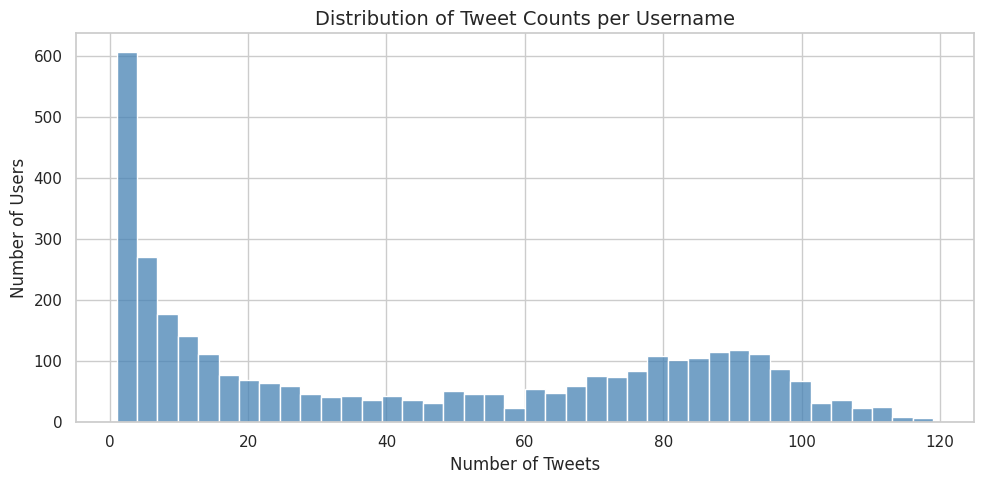

In [ ]:
import matplotlib.ticker as ticker

# Load your data (adjust path if needed)
file_path = '/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-cleaned-french-tweets.csv'
df = pd.read_csv(file_path, dtype={'id': str})

# Count tweets per username
user_tweet_counts = df['username'].value_counts()

# Plot tweet frequency distribution with better formatting
plt.figure(figsize=(10, 5))
sns.histplot(user_tweet_counts, bins=40, kde=False, color='steelblue')

plt.title("Distribution of Tweet Counts per Username", fontsize=14)
plt.xlabel("Number of Tweets", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)

# Turn off scientific notation on x-axis
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

5. Final report

In [ ]:
import pandas as pd
import spacy

# Load spaCy French model
nlp = spacy.load("fr_core_news_sm")

# Load your dataset
file_path = '/content/drive/My Drive/_thesis_dogwhistles/Clean-tweets/left-cleaned-french-tweets.csv'
df = pd.read_csv(file_path, dtype={'id': str})

# Drop rows with missing content
df = df.dropna(subset=['content'])

# === Tweet/User Stats ===
num_tweets = len(df)
num_users = df['username'].nunique()
avg_tweets_per_user = num_tweets / num_users if num_users else 0

# === Linguistic Stats ===
total_tokens = 0
word_count = 0
content_word_count = 0
lemmas = set()

# === Process all documents ===
for doc in nlp.pipe(df['content'].astype(str), batch_size=1000):
    # All non-space tokens
    tokens = [token for token in doc if not token.is_space]
    total_tokens += len(tokens)

    # Words = alphabetic tokens (exclude numbers and punctuation)
    words = [token for token in tokens if token.is_alpha]
    word_count += len(words)

    # Content words = words excluding stopwords, pronouns, determiners
    content_words = [
        token for token in words
        if not token.is_stop and token.pos_ not in {"PRON", "DET"}
    ]
    content_word_count += len(content_words)

    # Lemmas from words (not content words)
    lemmas.update(token.lemma_.lower() for token in words)

# Token-to-type ratio (based on total tokens and unique lemmas)
token_type_ratio = total_tokens / len(lemmas) if lemmas else 0

# === Report ===
print("===== Tweet/User Stats =====")
print(f"Total number of tweets: {num_tweets}")
print(f"Total number of unique users: {num_users}")
print(f"Average number of tweets per user: {avg_tweets_per_user:.2f}")

print("\n===== Linguistic Stats =====")
print(f"Total number of tokens (excluding spaces): {total_tokens}")
print(f"Total number of words (excluding numbers and punctuation): {word_count}")
print(f"Total number of content words: {content_word_count}")
print(f"Total number of unique lemmas: {len(lemmas)}")
print(f"Token-to-type ratio: {token_type_ratio:.2f}")

===== Tweet/User Stats =====
Total number of tweets: 165235
Total number of unique users: 3905
Average number of tweets per user: 42.31

===== Linguistic Stats =====
Total number of tokens (excluding spaces): 3877904
Total number of words (excluding numbers and punctuation): 3119164
Total number of content words: 1409462
Total number of unique lemmas: 74281
Token-to-type ratio: 52.21


Frequency differences between lemmas of both corpora

In [ ]:
# 1. Install necessary packages
!pip install -U spacy emoji matplotlib pandas seaborn
!python -m spacy download fr_core_news_md

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import spacy
from collections import Counter
from math import log2

# 3. Load French Spacy model
nlp = spacy.load("fr_core_news_md")

# 4. Load datasets
right_path = "/content/drive/My Drive/_thesis_dogwhistles/Analyze-tweets/right-cleaned-french-tweets.csv"
left_path = "/content/drive/My Drive/_thesis_dogwhistles/Analyze-tweets/left-cleaned-french-tweets.csv"

right_df = pd.read_csv(right_path)
left_df = pd.read_csv(left_path)

# 5. Extract text content
right_texts = right_df['content'].dropna().astype(str).tolist()
left_texts = left_df['content'].dropna().astype(str).tolist()

# 6. Function to lemmatize and include emojis
def tokenize_and_lemmatize(texts):
    lemma_counter = Counter()
    for doc in nlp.pipe(texts, batch_size=100, disable=["ner"]):
        for token in doc:
            if token.is_alpha or emoji.is_emoji(token.text):
                lemma = token.lemma_.lower()
                lemma_counter[lemma] += 1
    return lemma_counter

# 7. Compute lemma frequencies
print("Processing right corpus...")
right_lemmas = tokenize_and_lemmatize(right_texts)
print("Processing left corpus...")
left_lemmas = tokenize_and_lemmatize(left_texts)

# 8. Create a DataFrame with counts
df = pd.DataFrame.from_dict({
    'left': left_lemmas,
    'right': right_lemmas
}, orient='index').fillna(0)

df['left'] = df['left'].astype(int)
df['right'] = df['right'].astype(int)

# 9. Compute log ratio
df['log_ratio'] = np.log2((df['left'] + 1) / (df['right'] + 1))

# 10. Filter by frequency threshold
freq_threshold = 20
df_filtered = df[(df['left'] > freq_threshold) | (df['right'] > freq_threshold)]

# 11. Sort by absolute log ratio
df_filtered['abs_log_ratio'] = df_filtered['log_ratio'].abs()
df_sorted = df_filtered.sort_values(by='abs_log_ratio', ascending=False)

# 12. Show top 30 most divergent lemmas
print("Top divergent lemmas:")
print(df_sorted.head(30)[['left', 'right', 'log_ratio']])

# 13. Plot frequency distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['log_ratio'], bins=100, kde=True, color='purple')
plt.title('Distribution of Log Ratios Between Left and Right Tweet Corpora (French)')
plt.xlabel('Log2 Ratio (Left / Right)')
plt.ylabel('Number of Lemmas')
plt.axvline(x=1, color='red', linestyle='--', label='2× more frequent in left')
plt.axvline(x=-1, color='blue', linestyle='--', label='2× more frequent in right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 13.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/_thesis_dogwhistles/Analyze-tweets/left-cleaned-french-tweets.csv'